In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mlxtend.plotting import plot_decision_regions
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.svm import SVC
import networkx as nx
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv('NH_DB.csv')
data.head()
data.shape

(768, 10)

In [ ]:
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Adult', 'Senior'])

In [ ]:
scaler = StandardScaler()
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = scaler.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [4]:
#data['Glucose_BMI'] = data['Glucose'] * data['BMI']
data['Age_BMI'] = data['Age'] * data['BMI']
data['Glucose_Insulin'] = data['Glucose'] * data['Insulin']
data['Pregnancies_Age'] = data['Pregnancies'] * data['Age']
data['BloodPressure_BMI'] = data['BloodPressure'] * data['BMI']


In [ ]:
data = pd.get_dummies(data, columns=['AgeBin'], drop_first=True)

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


In [4]:
data = data.drop('S.no', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [8]:


columns_to_select = ['Age_BMI', 'Glucose_Insulin', 'Pregnancies_Age', 'BloodPressure_BMI', 'Outcome']

new_dataframe = data[columns_to_select].copy()


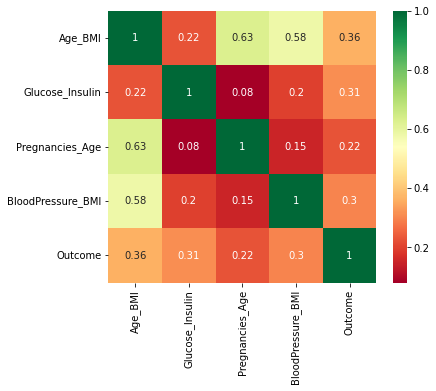

In [10]:
plt.figure(figsize=(6,5))
p = sns.heatmap(new_dataframe.corr(), annot=True, cmap='RdYlGn')


In [5]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_BMI,Glucose_Insulin,Pregnancies_Age,BloodPressure_BMI
0,6,148.0,72.0,35.00000,213.400000,33.6,0.627,50,1,1680.0,31583.200000,300,2419.2
1,1,85.0,66.0,29.00000,140.600000,26.6,0.351,31,0,824.6,11951.000000,31,1755.6
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,745.6,28465.324873,256,1491.2
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,590.1,8366.000000,21,1854.6
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1422.3,23016.000000,0,1724.0


In [8]:
data.to_csv('Feature_Engineered_Dataset.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print(results_df)

In [ ]:
results_df.to_csv('Feature_Engineered_Dataframe.csv', index=False)
